In [13]:
# ----------------------------
# Step 1: Import Libraries
# ----------------------------
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# ----------------------------
# Step 2: Load Dataset
# ----------------------------
ds = load_dataset("buio/heart-disease")
df = ds['train'].to_pandas()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0  


C:\Users\HP\AppData\Local\Temp\ipykernel_19404\1247086406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


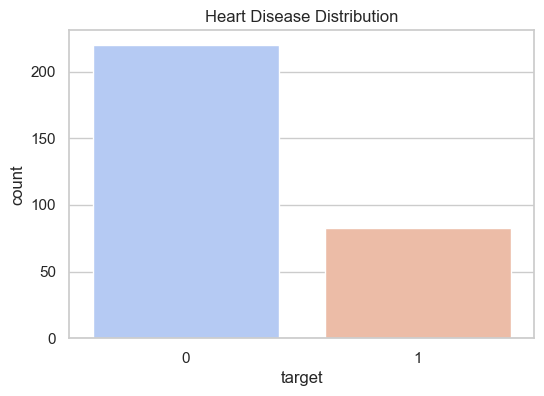

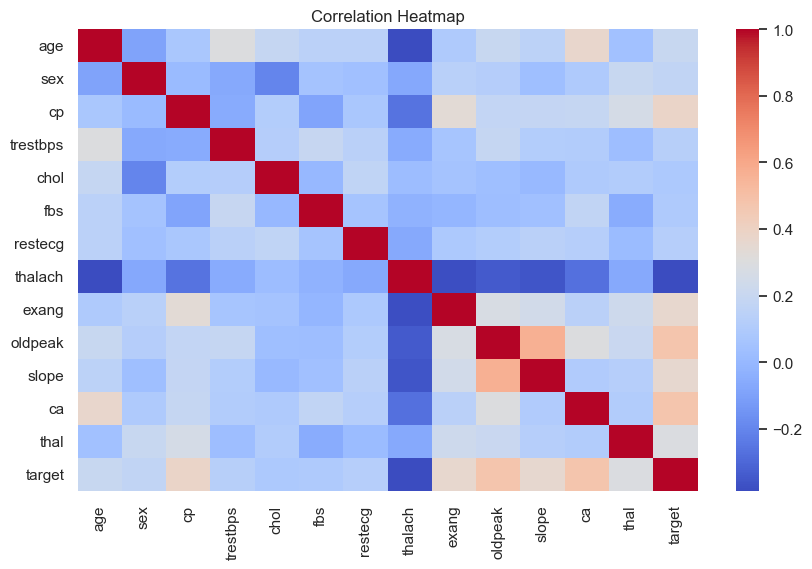

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

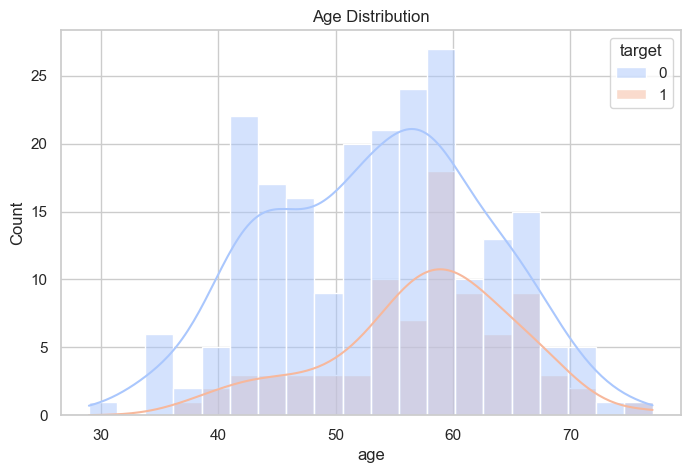

In [14]:
# ----------------------------
# Step 3: EDA (with Heatmap Fix)
# ----------------------------
sns.set(style="whitegrid")

# Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Heart Disease Distribution')
plt.show()

# Correlation Heatmap (encode categoricals temporarily)
df_encoded = df.copy()
cat_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Age distribution by target
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True, palette='coolwarm')
plt.title('Age Distribution')
plt.show()

In [16]:
# ----------------------------
# Step 4: Preprocessing
# ----------------------------
X = df.drop('target', axis=1)
y = df['target']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical Columns:", cat_cols)
print("Numeric Columns:", num_cols)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42, stratify=y
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Train Shape:", X_train_processed.shape)
print("Test Shape:", X_test_processed.shape)

Categorical Columns: ['thal']
Numeric Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']
Train Shape: (196, 17)
Test Shape: (107, 17)


Model Performance Comparison:
Logistic Regression Accuracy: 0.8411
Random Forest Accuracy:       0.8224

--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        78
           1       0.77      0.59      0.67        29

    accuracy                           0.84       107
   macro avg       0.82      0.76      0.78       107
weighted avg       0.84      0.84      0.83       107


--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        78
           1       0.78      0.48      0.60        29

    accuracy                           0.82       107
   macro avg       0.80      0.72      0.74       107
weighted avg       0.82      0.82      0.81       107



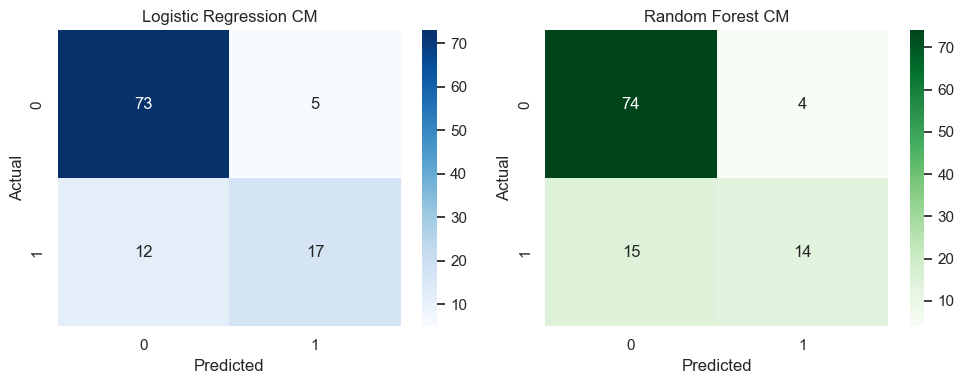


Selected Best Model: Logistic Regression


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# ----------------------------
# Step 3 (Extended): Train Logistic Regression vs Random Forest
# ----------------------------
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression (already trained above, but retrain for comparison)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_processed, y_train)
y_pred_log = log_reg.predict(X_test_processed)
acc_log = accuracy_score(y_test, y_pred_log)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_processed, y_train)
y_pred_rf = rf.predict(X_test_processed)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Results
print("Model Performance Comparison:")
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Random Forest Accuracy:       {acc_rf:.4f}")

# Detailed Metrics
print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, y_pred_log))

print("\n--- Random Forest Report ---")
print(classification_report(y_test, y_pred_rf))

# Compare confusion matrices visually
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression CM')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest CM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Choose Best Model
best_model = rf if acc_rf > acc_log else log_reg
print(f"\nSelected Best Model: {'Random Forest' if best_model == rf else 'Logistic Regression'}")



In [18]:
# ----------------------------
# Step 6: Save Preprocessor & Model
# ----------------------------
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(best_model, 'heart_disease_model.pkl')
print("Model and preprocessor saved!")

Model and preprocessor saved!


In [23]:
import joblib
import pandas as pd

# Load preprocessor and model
preprocessor = joblib.load('preprocessor.pkl')
model = joblib.load('heart_disease_model.pkl')

# Example input (matching dataset format: mostly numeric, 'thal' is text)
sample_input = pd.DataFrame([{
    'age': 55,
    'sex': 1,          # 1 = male, 0 = female
    'cp': 2,           # chest pain type (1-4 in dataset)
    'trestbps': 140,
    'chol': 250,
    'fbs': 0,          # 0 = false, 1 = true
    'restecg': 1,      # 0-2
    'thalach': 150,
    'exang': 0,        # 0 = no, 1 = yes
    'oldpeak': 1.5,
    'slope': 2,        # 1-3
    'ca': 0,
    'thal': 'normal'   # only non-numeric column
}])

# Match training feature order
sample_input = sample_input[preprocessor.feature_names_in_]

# Preprocess and predict
sample_processed = preprocessor.transform(sample_input)
prediction = model.predict(sample_processed)[0]

result = "Heart Disease Risk" if prediction == 1 else "No Risk Detected"
print(f"Prediction: {result}")


Prediction: No Risk Detected


In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')